In [ ]:
#Q24
#How much potato is produced each year? Find a dataset about potatoes and plot the production of potatoes by year for each country.
#What is unique about tomato as a fruit?(hint: use DATAWORLD 2024/W17 dataset)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("Tomato & Potato Production.csv", sep = ',')

In [5]:
df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1961,ha,15000.0
1,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1962,ha,15000.0
2,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1963,ha,15000.0
3,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1964,ha,15000.0
4,Crops and livestock products,Afghanistan,Area harvested,Potatoes,1965,ha,15000.0


In [6]:
df.sample(16)

,Domain,Area,Element,Item,Year,Unit,Value
45829,Crops and livestock products,Syrian Arab Republic,Area harvested,Potatoes,1996,ha,22252.0
9228,Crops and livestock products,China,Production,Potatoes,1997,tonnes,57259986.0
31959,Crops and livestock products,Montenegro,Yield,Tomatoes,2009,hg/ha,387990.0
18445,Crops and livestock products,France,Production,Tomatoes,1964,tonnes,522380.0
29712,Crops and livestock products,Malawi,Production,Tomatoes,1987,tonnes,33000.0
6757,Crops and livestock products,Bulgaria,Production,Tomatoes,1992,tonnes,443584.0
7344,Crops and livestock products,Cabo Verde,Yield,Potatoes,1974,hg/ha,100000.0
3037,Crops and livestock products,Bahamas,Area harvested,Tomatoes,2014,ha,144.0
17931,Crops and livestock products,Finland,Production,Potatoes,1999,tonnes,791100.0
17315,Crops and livestock products,Ethiopia PDR,Production,Tomatoes,1992,tonnes,51000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52937 entries, 0 to 52936
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   52937 non-null  object 
 1   Area     52937 non-null  object 
 2   Element  52937 non-null  object 
 3   Item     52937 non-null  object 
 4   Year     52937 non-null  int64  
 5   Unit     52937 non-null  object 
 6   Value    52937 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
# total unique values in df

df.nunique()

Domain         1
Area         195
Element        3
Item           2
Year          61
Unit           3
Value      34923
dtype: int64

C:\Users\Ask78\AppData\Local\Temp\ipykernel_3428\3578972069.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



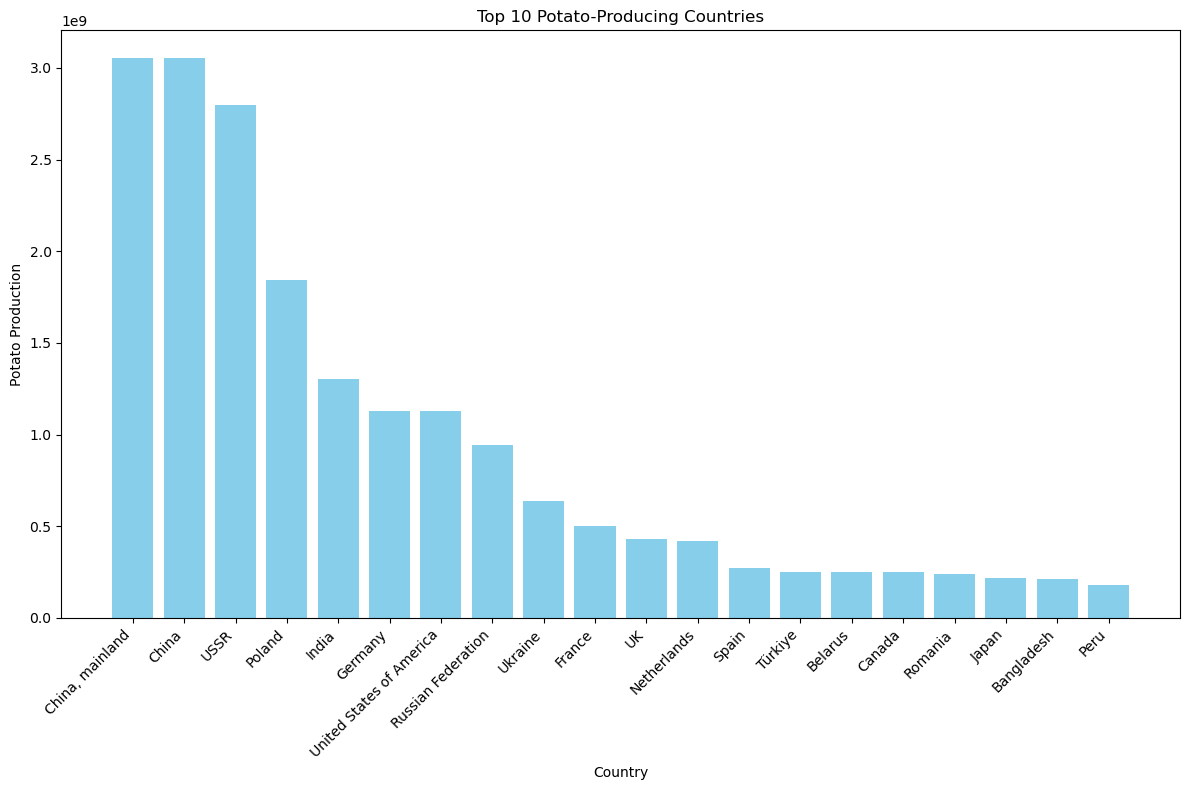

In [ ]:
# Filter the data for entries related to potatoes
potatoes_data = df[df['Item'] == 'Potatoes']

# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data['Area'] = potatoes_data['Area'].replace(
    {'United Kingdom of Great Britain and Northern Ireland': 'UK'}
)

# Group the filtered data by country to get total production for each country
grouped_data = potatoes_data.groupby('Area')['Value'].sum().reset_index()

# Sort the data by production in descending order to get top 10
top_10 = grouped_data.sort_values(by='Value', ascending=False).head(20)

# Plot the top 10 potato-producing countries
plt.figure(figsize=(12, 8))
plt.bar(top_10['Area'], top_10['Value'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Potato Production')
plt.title('Top 10 Potato-Producing Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Ask78\AppData\Local\Temp\ipykernel_3428\2313917089.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



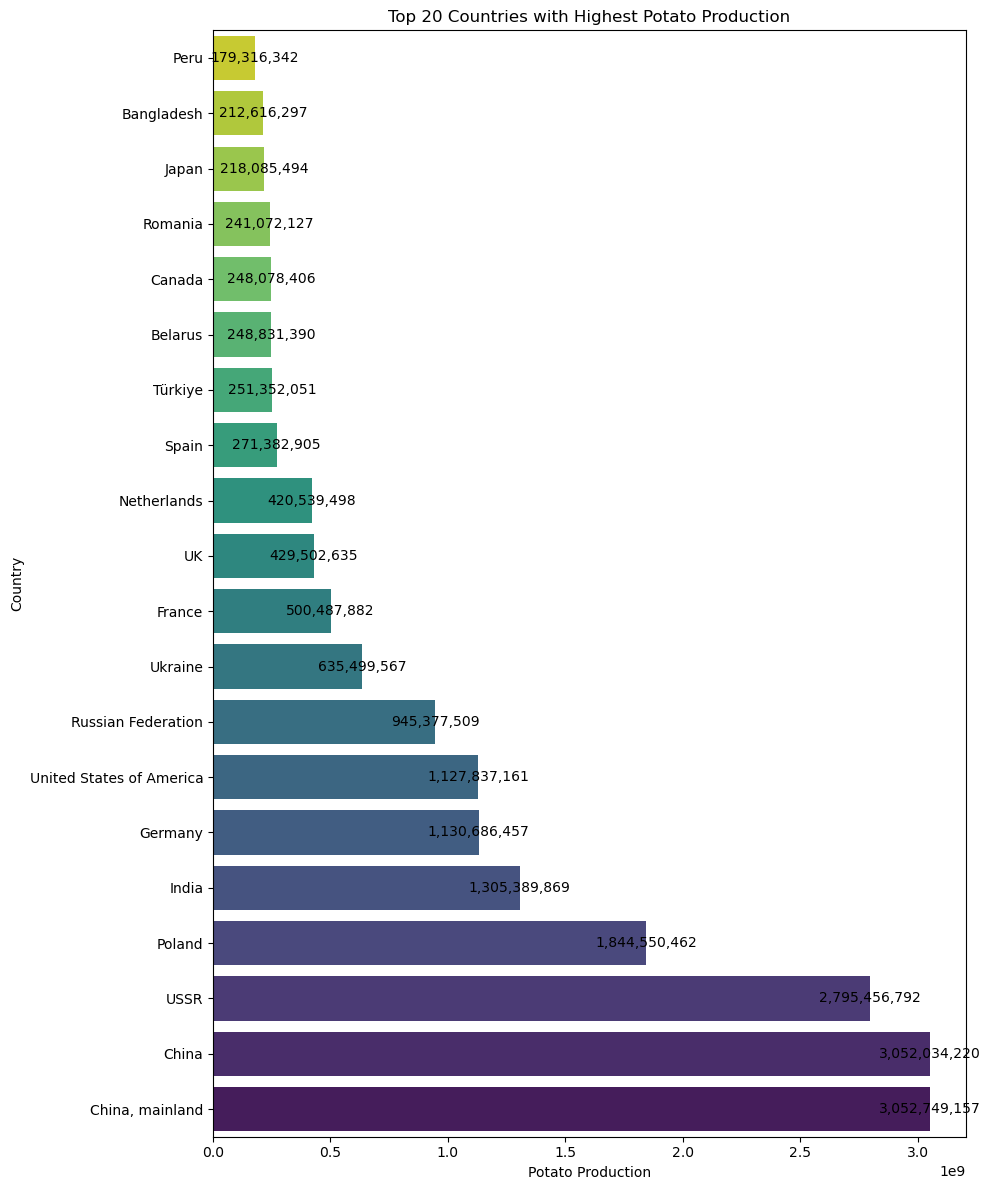

In [ ]:
# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data['Area'] = potatoes_data['Area'].replace(
    {'United Kingdom of Great Britain and Northern Ireland': 'UK'}
)

# Group the filtered data by year and country to get total production for each year in each country
grouped_data = potatoes_data.groupby(['Area'])['Value'].sum().reset_index()

# Sort the data by total production in descending order
top_20 = grouped_data.nlargest(20, 'Value')

# Create a horizontal bar plot with a dark background
plt.figure(figsize=(10, 12))
sns.barplot(x='Value', y='Area', data=top_20, palette='viridis', orient='h')
plt.xlabel('Potato Production')
plt.ylabel('Country')
plt.title('Top 20 Countries with Highest Potato Production')

# Adding rounded integer values on the bars
for index, value in enumerate(top_20['Value']):
    plt.text(value, index, f'{int(value):,}', ha='center', va='center', fontsize=10)

# Inverting the y-axis for better visualization (largest at the top)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

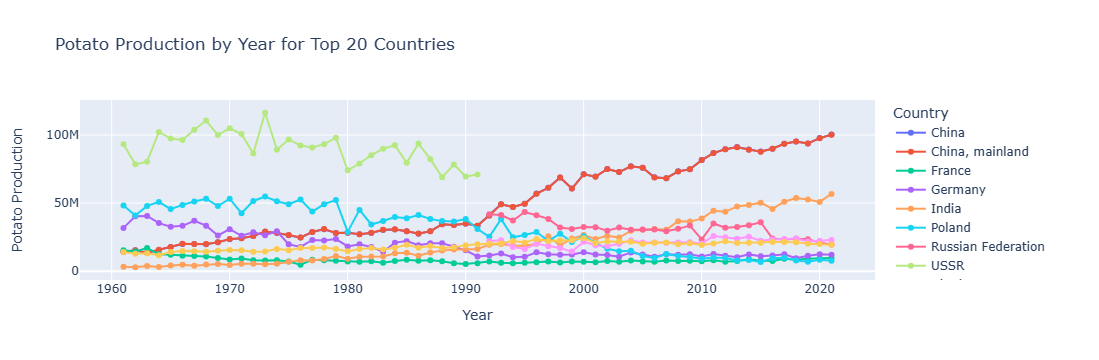

In [ ]:
import plotly.express as px
# Replace "United Kingdom of Great Britain and Northern Ireland" with "UK"
potatoes_data.loc[potatoes_data['Area'] == 'United Kingdom of Great Britain and Northern Ireland', 'Area'] = 'UK'

# Group the filtered data by country to get total production for each country over all years
total_production = potatoes_data.groupby('Area')['Value'].sum().reset_index()

# Select the top 20 countries with the highest total production
top_20_countries = total_production.nlargest(10, 'Value')['Area'].tolist()

# Filter the original data for only the top 20 countries
potatoes_top_20 = potatoes_data[potatoes_data['Area'].isin(top_20_countries)]

# Group the filtered data by year and country to get total production for each year in each country
grouped_data = potatoes_top_20.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# Create an animated line chart using Plotly
fig = px.line(grouped_data, x='Year', y='Value', color='Area', title='Potato Production by Year for Top 20 Countries')
fig.update_layout(xaxis_title='Year', yaxis_title='Potato Production', legend_title='Country')
fig.update_traces(mode='lines+markers')  # Add markers to the lines for better visibility

# Create and display the animated plot
fig.show()

In [11]:
#Tomatoes are unique as a fruit due to their botanical classification as berries 
#Berries are fruits that develop from the ovary of a flower and contain seeds. 
#Despite this botanical classification, tomatoes are primarily used in savory dishes and are often treated as vegetables in culinary contexts
#Infact, during the 19th century,in the USA, the Nix v. Hedden tarriff case gives a clue the uniqueness of tomato as a fruit.